In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import seaborn as sns

In [3]:
def flip(n_flips=10, n_coins=1000):
    flip_vals = []
    for i in range(n_flips):
        flip_vals.append(np.random.randint(2, size=n_coins))
    return np.array(flip_vals).T

In [59]:
n_times = 10**5
v1 = []
vrand = []
vmin = []
for i in tqdm_notebook(range(n_times)):
    crand = np.random.randint(1, 1000)
    flip_vals = flip()
    flip_mu = np.mean(flip_vals, axis=1)
    v1.append(flip_mu[0])
    vrand.append(flip_mu[crand])
    vmin.append(flip_mu[np.argmin(flip_mu)])
    
v1 = np.array(v1)
vrand = np.array(vrand)
vmin = np.array(vmin)
    
print('Average of v1: {}'.format(np.mean(v1)))
print('Average of vrand: {}'.format(np.mean(vrand)))
print('Average of vmin: {}'.format(np.mean(vmin)))


Average of v1: 0.50091
Average of vrand: 0.5006039999999999
Average of vmin: 0.037819


(array([6.2183e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.7815e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
 <a list of 10 Patch objects>)

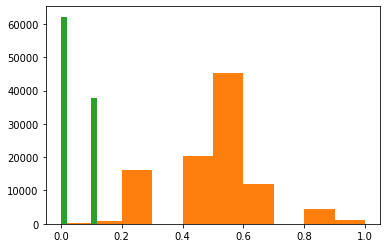

In [60]:
plt.figure()
plt.hist(v1)
plt.hist(vrand)
plt.hist(vmin)

In [109]:
def probability(outcomes, mu, eps):
    return np.mean(np.abs(outcomes - mu) > eps)
def hoeffding(eps, N):
    return 2*np.exp(-eps**2 * N)

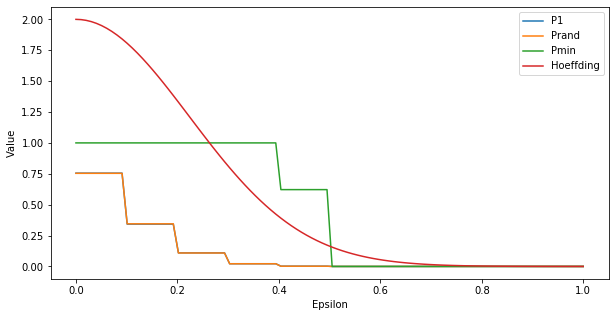

In [112]:
eps = np.linspace(0, 1, 100)
p1, prand, pmin = [], [], []
hoeff = []
for e in eps:
    p1.append(probability(v1, .5, e))
    prand.append(probability(vrand, .5, e))
    pmin.append(probability(vmin, .5, e))
    hoeff.append(hoeffding(e, 10))
    
plt.figure(figsize=(10,5))
plt.plot(eps, p1, label='P1')
plt.plot(eps, prand, label='Prand')
plt.plot(eps, pmin, label='Pmin')
plt.plot(eps, hoeff, label='Hoeffding')
plt.xlabel('Epsilon')
plt.ylabel('Value')
plt.legend()